In [1]:
import numpy as np
import importlib
import sys
sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Parallel_Simulation')
from Data_Treatement import *
import matplotlib.pyplot as plt
from scipy.special import erfc
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["xtick.direction"] = "in"
matplotlib.rcParams["ytick.direction"] = "in"
def sliding_average(X, Y, window_size=5):

    half_window = window_size // 2
    
    # Initialize smoothed Y array
    Y_smooth = np.convolve(Y, np.ones(window_size)/window_size, mode='valid')
    
    # Adjust X to match the size of the smoothed Y array
    # This centers the window on the point being averaged
    start_index = (window_size - 1) // 2
    end_index = start_index + len(Y_smooth)
    X_smooth = X[start_index:end_index]
    
    return X_smooth, Y_smooth
avR = lambda L,N : 2*(np.exp(-1.5/(L/N)) * np.sqrt(L/N*6/np.pi)*(3+2*L/N) - 9*erfc(np.sqrt(3/2/(L/N))))/(9*L/N) #average distance between equilibrated nodes
Lcharact = lambda L,N : (np.sqrt(2*L/N/3))

In [2]:
media = "/media/hcleroy/Simulation_Res/Cluster/N/100/mu5e_2/"
Names = ['E-15_N100_ell2E3_kdiffE-2.hdf','E-15_N100_ell2E3_kdiffE-3.hdf','E-15_N100_ell2E3_kdiffE-4.hdf']

NRGs,Entropies,clusters = list(),list(),list()
NRGs_lin,Entropies_lin = list(),list()
for name in Names:
    clusters.append(Data_Treatement(media+name,data_type='cluster'))
    NRGs.append(Data_Treatement(media+name,data_type='NRG'))
    Entropies.append(Data_Treatement(media+name,data_type='Entropy'))
    NRGs_lin.append(Data_Treatement(media+name,data_type='NRG'))
    Entropies_lin.append(Data_Treatement(media+name,data_type='Entropy'))

for cluster  in clusters:
    cluster.average(num_bins=50,log_scale=True)
for nrg in NRGs:
    nrg.average(num_bins=50,log_scale=True)
for entropy in Entropies:
    entropy.average(num_bins=50,log_scale=True)
#for nrg in NRGs_lin:
#    nrg.data= nrg.data[:,:100]
#    nrg.time = nrg.time[:,:100]
#    nrg.average(num_bins=50,log_scale=False)
#for entropy in Entropies_lin:
#    entropy.data = entropy.data[:,:100]
#    entropy.time = entropy.time[:,:100]
#    entropy.average(num_bins=50,log_scale=False)


# This is just to check that the average of the sum of entropy and energy is the same as the
# sum of the average. ====> It works
#Free_NRG_data = list()
#for nrg,entropy in zip(NRGs,Entropies):
#    time_free_nrg,average_free_nrg,variance_free_energy = average_scalar(nrg.time,
#                                                                         nrg.data - entropy.data,
#                                                                         num_bins=50,
#                                                                         log_scale=True,
#                                                                         min_bin_val=None)
#    average_free_nrg = interpolate_empty_bins(average_free_nrg)
#    Free_NRG_data.append([time_free_nrg,average_free_nrg])

/home/hcleroy/PostDoc/aging_condensates/Simulation/Parallel_Simulation/Data_Treatement.py:284: RuntimeWarning: invalid value encountered in divide
  weighted_average /=count


In [3]:
Free_NRG_data = list()
for nrg,entropy in zip(NRGs,Entropies):
    time_free_nrg,average_free_nrg,variance_free_energy = average_scalar(nrg.time[:,:10],
                                                                         nrg.data[:,:10] - entropy.data[:,:10],
                                                                         num_bins=20,
                                                                         log_scale=False,
                                                                         min_bin_val=None)
    average_free_nrg = interpolate_empty_bins(average_free_nrg)
    Free_NRG_data.append([time_free_nrg,average_free_nrg])


/home/hcleroy/PostDoc/aging_condensates/Simulation/Parallel_Simulation/Data_Treatement.py:284: RuntimeWarning: invalid value encountered in divide
  weighted_average /=count


In [4]:
Ffree = lambda L,N,E :E*N -  L*np.log(4*np.pi)

(0.2, 0.35)

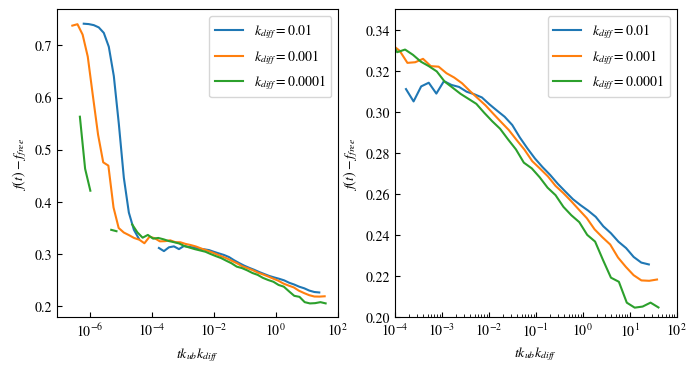

In [5]:
fig,ax = plt.subplots(ncols=2,figsize=(4*2,4))

for nrg,entropy in zip(NRGs,Entropies):
    ax[0].plot(nrg.binned_time*nrg.attributes['kdiff'],
               (nrg.average_data-entropy.average_data - Ffree(nrg.attributes['ell_tot'],
                                                              nrg.attributes['Nlinker'],
                                                              nrg.attributes['Energy']))/nrg.attributes['ell_tot'],label=r'$k_{diff}=$'+str(nrg.attributes['kdiff']))
    ax[1].plot(nrg.binned_time*nrg.attributes['kdiff'],
               (nrg.average_data-entropy.average_data - Ffree(nrg.attributes['ell_tot'],
                                                              nrg.attributes['Nlinker'],
                                                              nrg.attributes['Energy']))/nrg.attributes['ell_tot'],label=r'$k_{diff}=$'+str(nrg.attributes['kdiff']))
#for free_energy in Free_NRG_data:
#    ax[1].plot(free_energy[0],
#               (free_energy[1] - Ffree(nrg.attributes['ell_tot'],
#                                                              nrg.attributes['Nlinker'],
#                                                              nrg.attributes['Energy']))/nrg.attributes['ell_tot'])
for i in range(2):
    ax[i].set_xscale('log')
    ax[i].set_ylabel(r'$f(t) - f_{free}$')
    ax[i].set_xlabel(r'$t k_{ub} k_{diff}$')
    ax[i].legend()

#ax[1].set_xlim(10**-6,10**-4)
ax[1].set_xlim(10**-4,10**2)
ax[1].set_ylim(0.2,0.35)
#fig.savefig('influence_kdiff.svg',transparent=True,bbox_inches='tight')

Text(0.5, 0, '$t k_{ub} k_{diff}$')

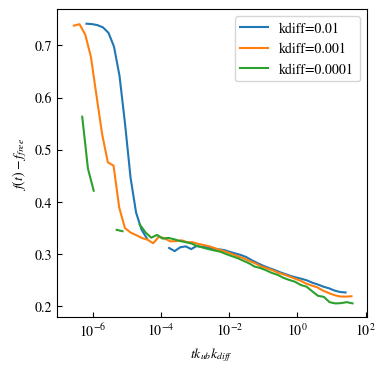

In [6]:
plt.figure(figsize=(4,4))
for nrg,entropy in zip(NRGs,Entropies):
    plt.plot(nrg.binned_time*nrg.attributes['kdiff'],
               (nrg.average_data-entropy.average_data - Ffree(nrg.attributes['ell_tot'],
                                                              nrg.attributes['Nlinker'],
                                                              nrg.attributes['Energy']))/nrg.attributes['ell_tot'],
            label='kdiff='+str(nrg.attributes['kdiff']))
#plt.xlim(10**-4,60)
#plt.ylim(0.2,0.35)
plt.xscale('log')
plt.legend()
plt.ylabel(r'$f(t) - f_{free}$')
plt.xlabel(r'$t k_{ub} k_{diff}$')
#plt.savefig('free_energy_kdiff.svg',transparent=True,bbox_inches='tight')

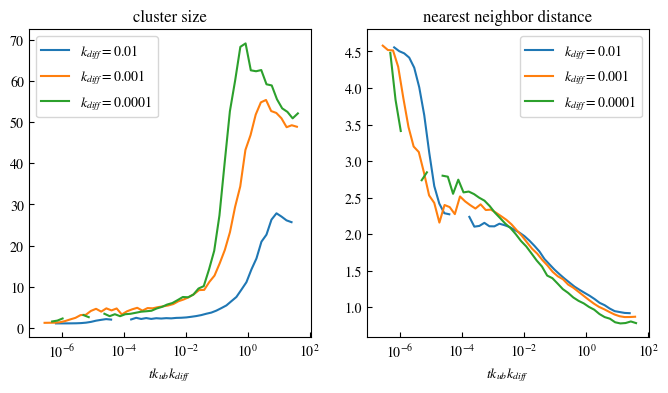

In [9]:
fig,ax = plt.subplots(ncols=2,figsize=(4*2,4))
for cluster in clusters:
    ax[0].plot(cluster.binned_time*cluster.attributes['kdiff'],cluster.average_data[:,0],label=r'$k_{diff}=$'+str(cluster.attributes['kdiff']))
    #ax[1].plot(cluster.binned_time*cluster.attributes['kdiff'],cluster.average_data[:,1],label=r'$k_{diff}=$'+str(cluster.attributes['kdiff']))
    ax[1].plot(cluster.binned_time*cluster.attributes['kdiff'],cluster.average_data[:,2],label=r'$k_{diff}=$'+str(cluster.attributes['kdiff']))
for i in range(2):
    ax[i].set_xscale('log')
    ax[i].set_xlabel(r'$t k_{ub} k_{diff}$')
    ax[i].legend()
ax[0].set_title('cluster size')
#ax[1].set_title('inter cluster distance')
ax[1].set_title('nearest neighbor distance')
fig.savefig('cluster_kdiff.svg',transparent=True,bbox_inches='tight')